In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import torch.nn.functional as F

In [3]:
#Data prep
# Transformations pour normaliser les données
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Chargement des ensembles d'entraînement et de test
train_set = torchvision.datasets.FashionMNIST(
    root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.FashionMNIST(
    root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

0.2%

100.0%


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw


100.0%


Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw




10.4%

100.0%
100.0%

Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw

Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



In [24]:
#CNN model definition
class SimpleCNN(nn.Module):
    def __init__(self):
        """super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.pool = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(64 * 5 * 5, 64)  # Dense layer avec 64 neurones
        self.fc2 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(0.25)"""

        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3)
        self.pool = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(128 * 5 * 5, 64)  # Dense layer avec 64 neurones
        self.fc2 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(0.25)

        """super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3)
        self.pool = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(128 * 5 * 5, 32)  # Dense layer avec 32 neurones
        self.fc2 = nn.Linear(32, 10)
        self.dropout = nn.Dropout(0.25)"""
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)  
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


model_cnn = SimpleCNN()

In [25]:
#Loss function and optimizer definition
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_cnn.parameters(), lr=0.001)

In [28]:
#Model training
num_epochs = 10

for epoch in range(num_epochs):
    model_cnn.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model_cnn(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}')

Epoch 1/10, Loss: 0.2408
Epoch 2/10, Loss: 0.2246
Epoch 3/10, Loss: 0.2105
Epoch 4/10, Loss: 0.1957
Epoch 5/10, Loss: 0.1828
Epoch 6/10, Loss: 0.1736
Epoch 7/10, Loss: 0.1615
Epoch 8/10, Loss: 0.1520
Epoch 9/10, Loss: 0.1444
Epoch 10/10, Loss: 0.1383


              precision    recall  f1-score   support

 T-shirt/top       0.86      0.86      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.86      0.89      0.88      1000
       Dress       0.92      0.93      0.92      1000
        Coat       0.87      0.88      0.88      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.75      0.74      0.75      1000
     Sneaker       0.94      0.98      0.96      1000
         Bag       0.99      0.97      0.98      1000
  Ankle boot       0.99      0.95      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



C:\Users\Nabil\AppData\Local\Temp\ipykernel_12576\2004725434.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis', ax=ax[1])


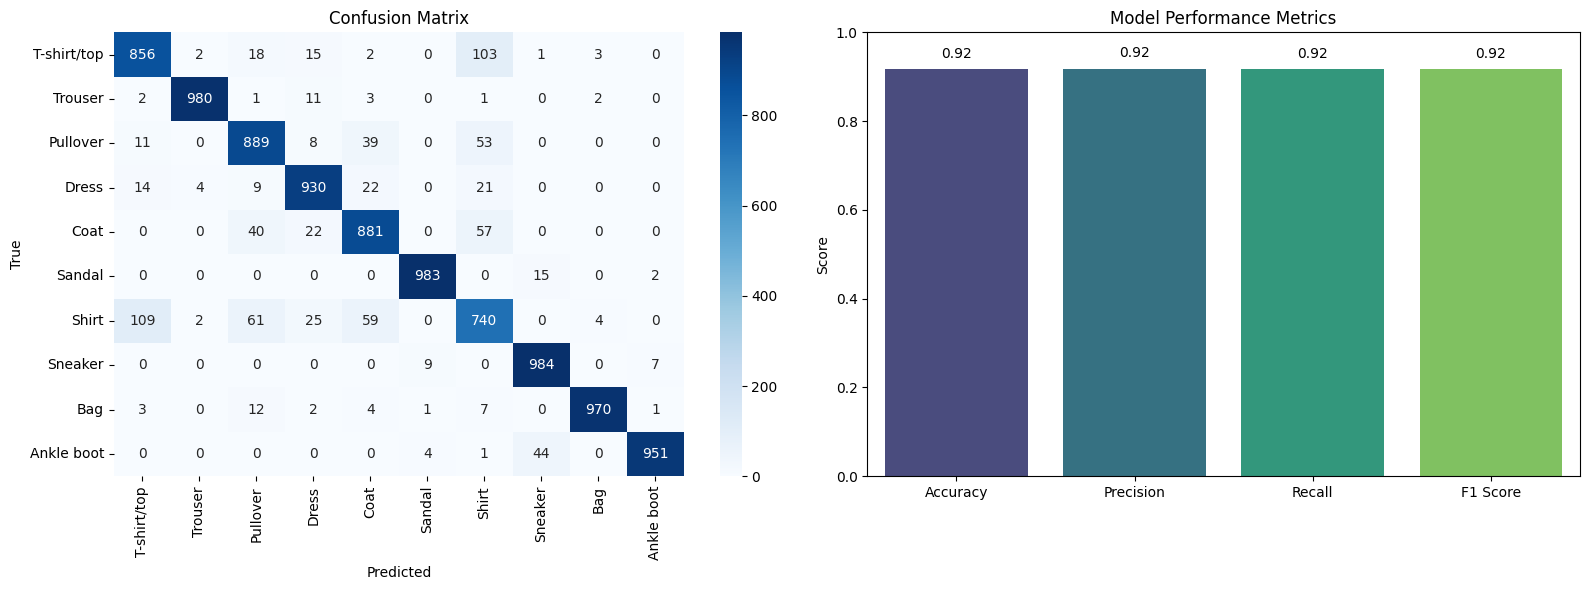

In [29]:
# Évaluation du modèle
model_cnn.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model_cnn(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(predicted.numpy())

# Afficher le rapport de classification
report = classification_report(y_true, y_pred, target_names=train_set.classes, output_dict=True)
print(classification_report(y_true, y_pred, target_names=train_set.classes))

# Matrice de confusion
cm = confusion_matrix(y_true, y_pred)

# Extraire les métriques
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Afficher la matrice de confusion et l'histogramme des métriques
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Matrice de confusion
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0], 
            xticklabels=train_set.classes, yticklabels=train_set.classes)
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')

# Histogramme des métriques
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]
sns.barplot(x=metrics, y=values, palette='viridis', ax=ax[1])

# Ajouter les valeurs des métriques au sommet des barres
for i, v in enumerate(values):
    ax[1].text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom')

ax[1].set_ylim(0, 1)
ax[1].set_title('Model Performance Metrics')
ax[1].set_ylabel('Score')

plt.tight_layout()
plt.show()

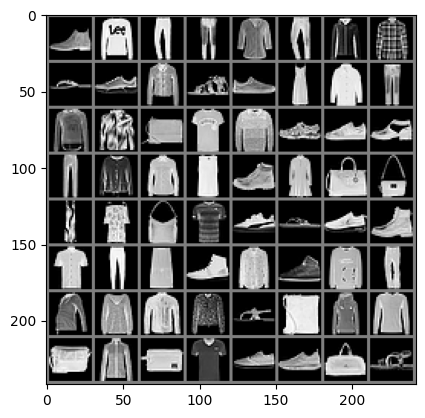

GroundTruth:  Ankle boot Pullover Trouser Trouser Shirt Trouser Coat Shirt
Predicted:  Ankle boot Pullover Trouser Trouser Shirt Trouser Coat Coat


In [ ]:
#Data visualisation
def imshow(img):
    img = img / 2 + 0.5  # dénormaliser
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Obtenir des données d'exemple
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Afficher les images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{train_set.classes[labels[j]]}' for j in range(8)))

# Prédire
outputs = model_cnn(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{train_set.classes[predicted[j]]}' for j in range(8)))

# Mini ResNet

In [ ]:
class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)
    
    def forward(self, x):
        identity = x
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += identity
        return F.relu(out)

class MiniResNet(nn.Module):
    def __init__(self, num_blocks=3, filters=64):
        super(MiniResNet, self).__init__()
        self.conv1 = nn.Conv2d(1, filters, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(filters)
        self.layers = self._make_layers(num_blocks, filters)
        self.fc = nn.Linear(filters * 7 * 7, 10)
    
    def _make_layers(self, num_blocks, filters):
        layers = []
        for _ in range(num_blocks):
            layers.append(BasicBlock(filters, filters))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.max_pool2d(x, 2)
        x = self.layers(x)
        x = F.max_pool2d(x, 2)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

In [ ]:
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_set = torchvision.datasets.FashionMNIST(
    root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.FashionMNIST(
    root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

In [31]:
#model_miniresnet = MiniResNet(num_blocks=3, filters=64)
model_miniresnet = MiniResNet(num_blocks=4, filters=64)
#model_miniresnet = MiniResNet(num_blocks=5, filters=64)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_miniresnet.parameters(), lr=0.001)


In [32]:
num_epochs = 10

for epoch in range(num_epochs):
    model_miniresnet.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images, labels
        optimizer.zero_grad()
        outputs = model_miniresnet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}')

Epoch 1/10, Loss: 0.4520
Epoch 2/10, Loss: 0.2643
Epoch 3/10, Loss: 0.2218
Epoch 4/10, Loss: 0.1954
Epoch 5/10, Loss: 0.1762
Epoch 6/10, Loss: 0.1539
Epoch 7/10, Loss: 0.1356
Epoch 8/10, Loss: 0.1166
Epoch 9/10, Loss: 0.1004
Epoch 10/10, Loss: 0.0867


MiniResNet Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.89      0.85      0.87      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.89      0.90      0.90      1000
       Dress       0.94      0.91      0.92      1000
        Coat       0.85      0.92      0.88      1000
      Sandal       0.98      0.99      0.98      1000
       Shirt       0.79      0.77      0.78      1000
     Sneaker       0.97      0.97      0.97      1000
         Bag       0.99      0.98      0.99      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.93      0.92      0.92     10000
weighted avg       0.93      0.92      0.92     10000



C:\Users\Nabil\AppData\Local\Temp\ipykernel_12576\1249569185.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis', ax=ax[1])


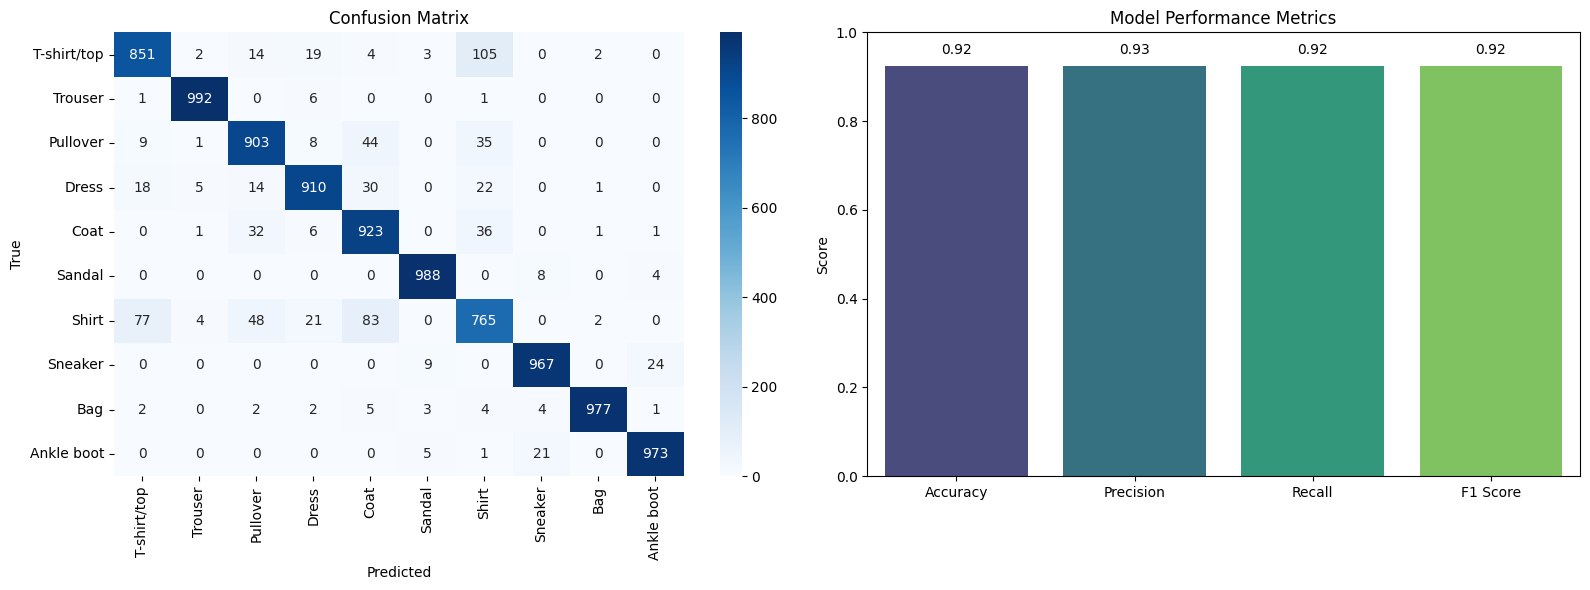

In [30]:
# Évaluation du modèle MiniResNet
model_miniresnet.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model_miniresnet(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

print("MiniResNet Classification Report:")
print(classification_report(y_true, y_pred, target_names=train_set.classes))

# Matrice de confusion
cm = confusion_matrix(y_true, y_pred)

# Extraire les métriques
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Afficher la matrice de confusion et l'histogramme des métriques
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Matrice de confusion
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0], 
            xticklabels=train_set.classes, yticklabels=train_set.classes)
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')

# Histogramme des métriques
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]
sns.barplot(x=metrics, y=values, palette='viridis', ax=ax[1])

# Ajouter les valeurs des métriques au sommet des barres
for i, v in enumerate(values):
    ax[1].text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom')

ax[1].set_ylim(0, 1)
ax[1].set_title('Model Performance Metrics')
ax[1].set_ylabel('Score')

plt.tight_layout()
plt.show()

# Comparison

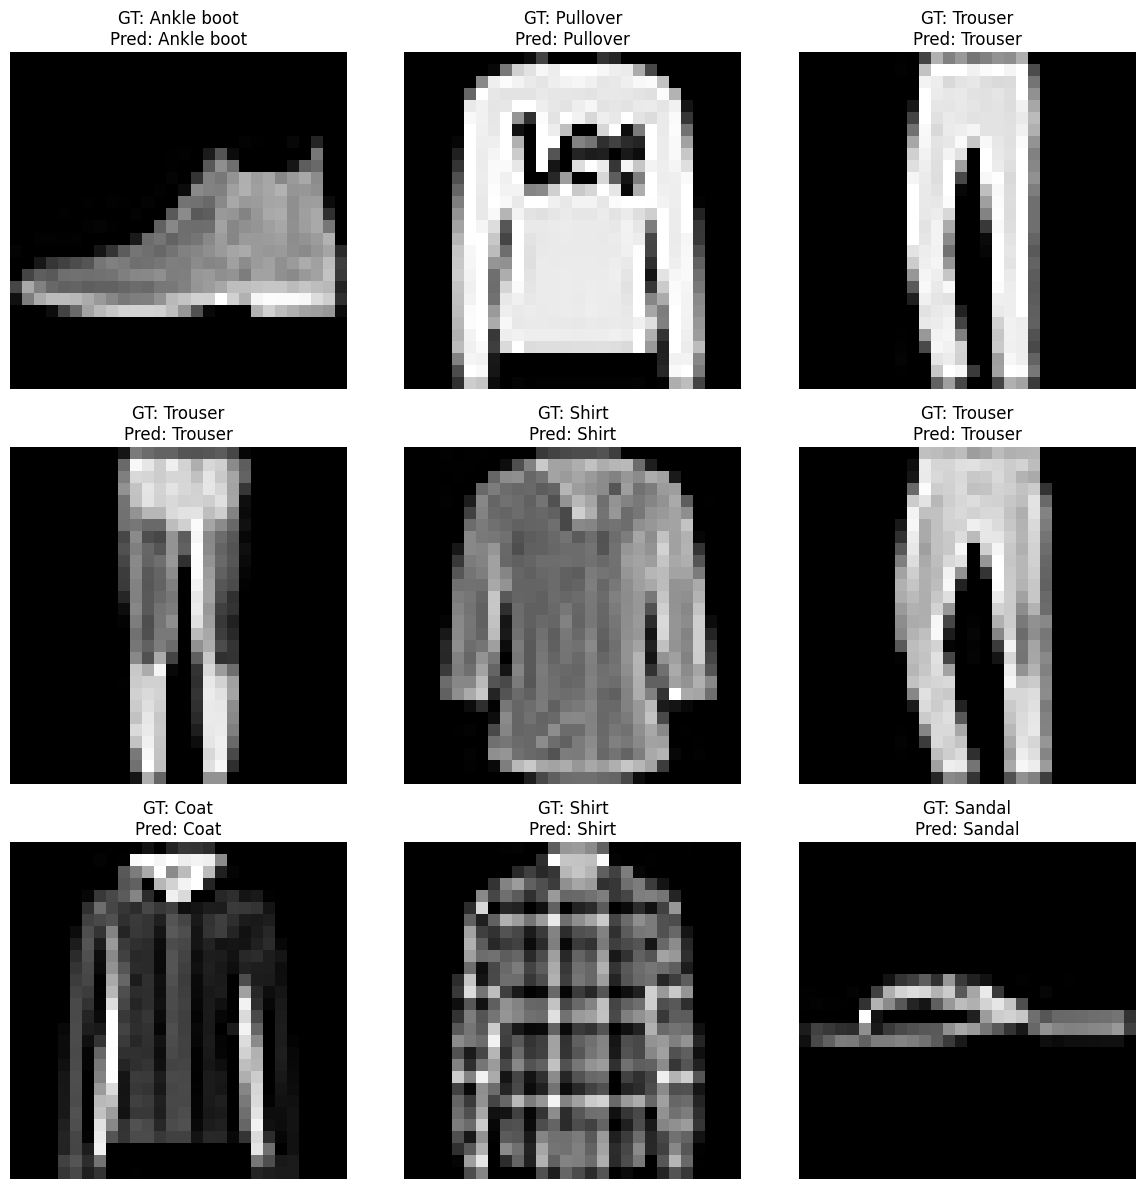

In [33]:
# Afficher des résultats qualitatifs : images, prédictions et vérités terrain
model_miniresnet.eval()
images, labels = next(iter(test_loader))
outputs = model_miniresnet(images)
_, predicted = torch.max(outputs, 1)

# Afficher quelques images avec prédictions et vérités terrain
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.flatten()
for i in range(9):
    img = images[i].numpy().transpose((1, 2, 0))
    label = train_set.classes[labels[i]]
    pred = train_set.classes[predicted[i]]
    axes[i].imshow(img.squeeze(), cmap='gray')
    axes[i].set_title(f'GT: {label}\nPred: {pred}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()